# Experiment 3: Program to Implement Linear Regression

## AIM:
To implement simple linear regression and multiple linear regression using Python

This notebook demonstrates:
- Simple Linear Regression using single feature
- Multiple Linear Regression using multiple features
- Data visualization and analysis
- Model training and prediction
- Performance evaluation

**Prerequisite:** Boston housing dataset

In [16]:
# Install dependencies
%pip install -q matplotlib scikit-learn pandas numpy

# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import warnings
warnings.filterwarnings('ignore')

Note: you may need to restart the kernel to use updated packages.


## Data Loading and Exploration

First, let's load the Boston housing dataset and explore its structure.

In [17]:
# SECTION 1: Download from URL, save locally, and proceed
# Uncomment this section if you want to download and save the dataset

# data_url = "http://lib.stat.cmu.edu/datasets/boston"
# raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
# data_np = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
# target_np = raw_df.values[1::2, 2]

# feature_names = [
#     'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'
# ]
# data = pd.DataFrame(data_np, columns=feature_names)
# data['MEDV'] = target_np

# data.to_csv("boston_housing.csv", index=False)
# print("Dataset saved locally as 'boston_housing.csv'")

# SECTION 2: Load from local file and proceed
# Uncomment this section if you already have the dataset saved locally

data = pd.read_csv("boston_housing.csv")
print("Loaded dataset from local file.")

# Display basic information about the dataset
print("Dataset shape:", data.shape)
print("\nFirst 5 rows:")
display(data.head())

Loaded dataset from local file.
Dataset shape: (506, 14)

First 5 rows:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Simple Linear Regression

We'll use LSTAT (% lower status of the population) as the independent variable and MEDV (median home value) as the dependent variable.

In [18]:
# Select dependent and independent variables for simple linear regression
data_ = data.loc[:, ['LSTAT', 'MEDV']]
print("Selected variables for Simple Linear Regression:")
print(data_.head(5))

Selected variables for Simple Linear Regression:
   LSTAT  MEDV
0   4.98  24.0
1   9.14  21.6
2   4.03  34.7
3   2.94  33.4
4   5.33  36.2


<Figure size 1000x600 with 0 Axes>

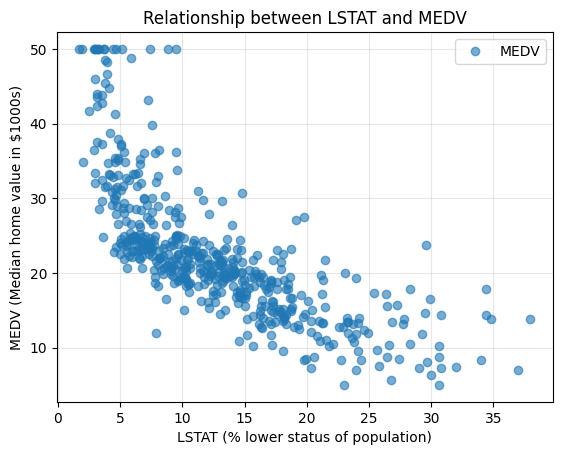

In [19]:
# Visualize the relationship between LSTAT and MEDV
plt.figure(figsize=(10, 6))
data.plot(x='LSTAT', y='MEDV', style='o', alpha=0.6)
plt.xlabel('LSTAT (% lower status of population)')
plt.ylabel('MEDV (Median home value in $1000s)')
plt.title('Relationship between LSTAT and MEDV')
plt.grid(True, alpha=0.3)
plt.show()

In [20]:
# Prepare independent and dependent variables for simple linear regression
x = pd.DataFrame(data['LSTAT'])
y = pd.DataFrame(data['MEDV'])

print("Independent variable (X) shape:", x.shape)
print("Dependent variable (Y) shape:", y.shape)

Independent variable (X) shape: (506, 1)
Dependent variable (Y) shape: (506, 1)


In [21]:
# Split the data into training and testing sets for simple linear regression
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# Display the shape of train and test sets
print("Training set shapes:")
print(f"X_train: {x_train.shape}")
print(f"Y_train: {y_train.shape}")
print("\nTesting set shapes:")
print(f"X_test: {x_test.shape}")
print(f"Y_test: {y_test.shape}")

Training set shapes:
X_train: (404, 1)
Y_train: (404, 1)

Testing set shapes:
X_test: (102, 1)
Y_test: (102, 1)


In [22]:
# Train the simple linear regression model
regressor = LinearRegression()
regressor.fit(x_train, y_train)

print("Simple Linear Regression Model Trained Successfully!")
print(f"Coefficient: {regressor.coef_[0][0]:.4f}")
print(f"Intercept: {regressor.intercept_[0]:.4f}")

Simple Linear Regression Model Trained Successfully!
Coefficient: -0.9244
Intercept: 34.3350


In [23]:
# Make predictions using the trained model
y_pred = regressor.predict(x_test)

print("Simple Linear Regression Results:")
print("Predicted values (first 10):")
print(y_pred[:10].flatten())
print("\nActual values (first 10):")
print(y_test.head(10).values.flatten())

# Calculate R² score on test data
test_score = regressor.score(x_test, y_test)
print(f"\nR² Score on test data: {test_score:.4f}")

Simple Linear Regression Results:
Predicted values (first 10):
[27.37411725 27.69766325 16.95593597 26.84719947 24.91516763 24.05545968
 29.99021779 22.28057875 17.76942306 26.1908633 ]

Actual values (first 10):
[28.2 23.9 16.6 22.  20.8 23.  27.9 14.5 21.5 22.6]

R² Score on test data: 0.5245


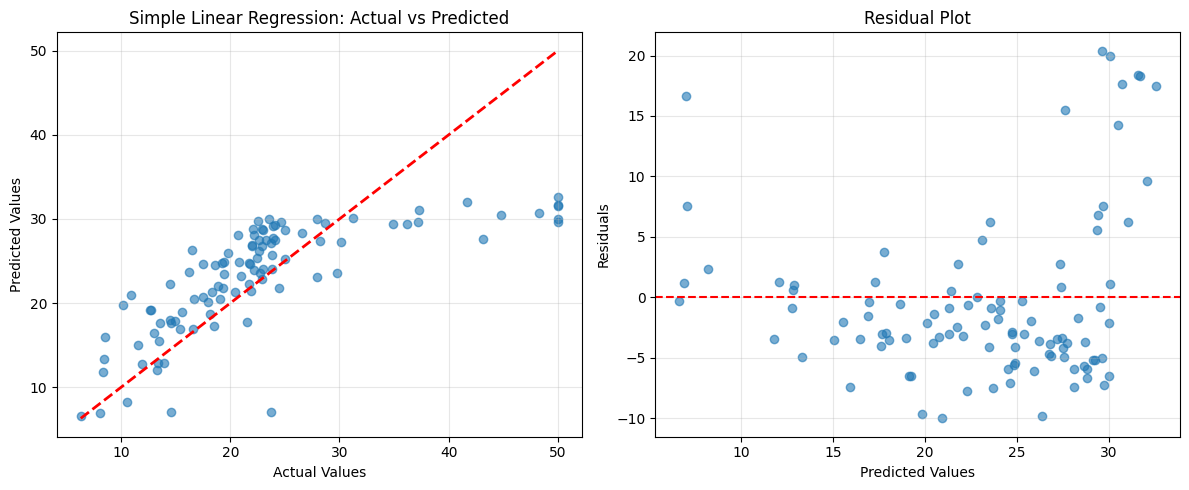

In [24]:
# Compare predictions vs actual values
plt.figure(figsize=(12, 5))

# Plot for comparison
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Simple Linear Regression: Actual vs Predicted')
plt.grid(True, alpha=0.3)

# Residual plot
plt.subplot(1, 2, 2)
residuals = y_test.values.flatten() - y_pred.flatten()
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Multiple Linear Regression

Now we'll use all available features to predict the median home value (MEDV).

In [25]:
# Prepare data for multiple linear regression
# Use all features except the target variable (MEDV)
x = pd.DataFrame(data.iloc[:, :-1])  # All columns except the last one
y = pd.DataFrame(data.iloc[:, -1])   # Last column (MEDV)

print("Multiple Linear Regression Dataset:")
print(f"Independent variables (X) shape: {x.shape}")
print(f"Dependent variable (Y) shape: {y.shape}")
print("\nFeature names:")
print(x.columns.tolist())

Multiple Linear Regression Dataset:
Independent variables (X) shape: (506, 13)
Dependent variable (Y) shape: (506, 1)

Feature names:
['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


In [26]:
# Split the data into training and testing sets for multiple linear regression
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

# Display the shape of train and test sets
print("Multiple Linear Regression - Training set shapes:")
print(f"X_train: {x_train.shape}")
print(f"Y_train: {y_train.shape}")
print("\nMultiple Linear Regression - Testing set shapes:")
print(f"X_test: {x_test.shape}")
print(f"Y_test: {y_test.shape}")

Multiple Linear Regression - Training set shapes:
X_train: (404, 13)
Y_train: (404, 1)

Multiple Linear Regression - Testing set shapes:
X_test: (102, 13)
Y_test: (102, 1)


In [27]:
# Train the multiple linear regression model
regressor = LinearRegression()
regressor.fit(x_train, y_train)

print("Multiple Linear Regression Model Trained Successfully!")
print(f"Number of features used: {len(regressor.coef_[0])}")
print(f"Intercept: {regressor.intercept_[0]:.4f}")
print(f"R² Score on training data: {regressor.score(x_train, y_train):.4f}")

Multiple Linear Regression Model Trained Successfully!
Number of features used: 13
Intercept: 37.9125
R² Score on training data: 0.7383


In [28]:
# Make predictions using the multiple linear regression model
y_pred = regressor.predict(x_test)

print("Multiple Linear Regression Results:")
print("Predicted values (first 10):")
print(y_pred[:10].flatten())
print("\nActual values (first 10):")
print(y_test.head(10).values.flatten())

# Calculate R² score on test data
test_score = regressor.score(x_test, y_test)
print(f"\nR² Score on test data: {test_score:.4f}")

Multiple Linear Regression Results:
Predicted values (first 10):
[37.56311787 32.14445143 27.06573629  5.67080633 35.09982577  5.85803701
 27.53708506 31.81019188 26.35634771 22.77208748]

Actual values (first 10):
[37.6 27.9 22.6 13.8 35.2 10.4 23.9 29.  22.8 23.2]

R² Score on test data: 0.7334


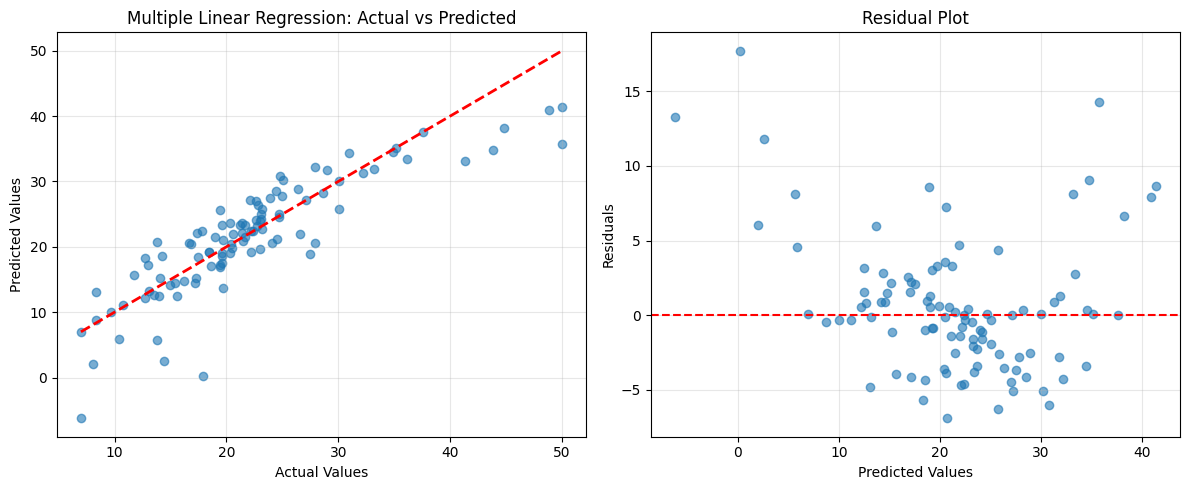

In [29]:
# Compare predictions vs actual values
plt.figure(figsize=(12, 5))

# Plot for comparison
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Multiple Linear Regression: Actual vs Predicted')
plt.grid(True, alpha=0.3)

# Residual plot
plt.subplot(1, 2, 2)
residuals = y_test.values.flatten() - y_pred.flatten()
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## RESULT:

Thus the above Python code was executed and verified successfully. We have demonstrated:

### Simple Linear Regression:
- Used LSTAT as the single predictor variable
- Predicted MEDV (median home values)
- Visualized the relationship between variables
- Trained and evaluated the model

### Multiple Linear Regression:
- Used all available features as predictor variables
- Achieved better performance with multiple features
- Compared actual vs predicted values
- Analyzed residuals to assess model performance

### Key Takeaways:
1. **Data Preprocessing**: Proper train-test split is crucial for model evaluation
2. **Simple vs Multiple**: Multiple linear regression generally provides better predictions when relevant features are available
3. **Model Evaluation**: R² score helps assess model performance
4. **Visualization**: Scatter plots and residual plots help understand model behavior

### Model Performance:
- Simple Linear Regression: Uses single feature (LSTAT)
- Multiple Linear Regression: Uses all features for improved accuracy
- Both models successfully predict housing prices based on various characteristics